In [7]:
import pandas as pd

In [8]:
d20_21 = pd.read_excel('DATOS HISTÓRICOS 2020_2021_TODAS ESTACIONES.xlsx', sheet_name='SURESTE3')
d22_23 = pd.read_excel('DATOS HISTÓRICOS 2022_2023_TODAS ESTACIONES.xlsx', sheet_name='SURESTE3')
df = pd.concat([d20_21,d22_23])

In [9]:
df['date'] = pd.to_datetime(df['date'])
df["date"] = (df["date"] - df.iloc[0,0]).apply(lambda x: x.value/3.6e+12)
df.head()

,date,CO,NO,NO2,NOX,O3,PM10,PM2.5,PRS,RAINF,RH,SO2,SR,TOUT,WSR,WDR
0,0.0,NaN,NaN,NaN,NaN,NaN,37.0,18.0,NaN,NaN,NaN,NaN,0.000,NaN,NaN,NaN
1,1.0,1.88,2.0,5.2,7.2,25.0,37.0,28.0,734.2,0.01,93.0,NaN,0.037,11.68,1.7,98.0
2,2.0,1.86,2.6,5.0,7.6,22.0,55.0,28.0,733.8,0.02,93.0,NaN,0.037,11.68,1.6,133.0
3,3.0,1.78,3.1,5.9,8.9,21.0,35.0,11.0,733.0,0.00,93.0,NaN,0.037,11.70,1.5,198.0
4,4.0,1.76,2.0,4.5,6.5,22.0,27.0,NaN,732.8,0.02,93.0,NaN,0.037,11.80,0.7,240.0


In [10]:
from sklearn.impute import KNNImputer as imputer
k = imputer(n_neighbors=4)
datos = k.fit_transform((df.iloc[:, :]).to_numpy())

In [11]:
limpios = pd.DataFrame(datos, columns=df.columns)
limpios

,date,CO,NO,NO2,NOX,O3,PM10,PM2.5,PRS,RAINF,RH,SO2,SR,TOUT,WSR,WDR
0,0.0,1.8775,4.3,6.375,10.625,19.25,37.0,18.00,733.025,0.015,92.75,0.850,0.000,12.2675,1.325,207.25
1,1.0,1.8800,2.0,5.200,7.200,25.00,37.0,28.00,734.200,0.010,93.00,1.775,0.037,11.6800,1.700,98.00
2,2.0,1.8600,2.6,5.000,7.600,22.00,55.0,28.00,733.800,0.020,93.00,0.750,0.037,11.6800,1.600,133.00
3,3.0,1.7800,3.1,5.900,8.900,21.00,35.0,11.00,733.000,0.000,93.00,0.725,0.037,11.7000,1.500,198.00
4,4.0,1.7600,2.0,4.500,6.500,22.00,27.0,10.25,732.800,0.020,93.00,0.775,0.037,11.8000,0.700,240.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31785,31795.0,0.7600,3.2,6.900,9.900,36.00,107.0,15.00,727.800,0.000,19.00,3.600,0.079,38.1800,12.700,54.00
31786,31796.0,0.7100,2.6,11.300,13.700,29.00,60.0,9.00,728.300,0.000,23.00,3.600,0.003,36.3800,8.900,50.00
31787,31797.0,0.7200,2.9,10.800,13.500,26.00,74.0,3.00,728.700,0.000,26.00,3.700,0.001,35.1000,10.500,56.00
31788,31798.0,0.6800,3.0,10.100,12.800,25.00,112.0,2.00,729.400,0.000,40.00,15.300,0.001,33.6000,16.900,86.00


In [12]:
intervalos={
    "SO2":[0.008, 0.11, 0.165, 0.22],
    "NO2":[8.75, 11, 13.3, 15.5],
    "etiqueta": ["bueno", "aceptable", "mala", "muy mala"]
}
def change(val, col):
    if val< intervalos[col][0]:
        return "bueno"
    if val< intervalos[col][1]:
        return "aceptable"
    if val< intervalos[col][2]:
        return "mala"
    if val< intervalos[col][3]:
        return "muy mala"
    return "Extremadamente mala"

In [13]:
limpios["NO2_discret"] = limpios["NO2"].apply(lambda x: change(x, "NO2"))
limpios["SO2_discret"] = (limpios["SO2"]*0.001).apply(lambda x: change(x, "SO2"))

In [14]:
limpios["SO2_pm"] = limpios["SO2"]*0.001

In [15]:
limpios.head()

,date,CO,NO,NO2,NOX,O3,PM10,PM2.5,PRS,RAINF,RH,SO2,SR,TOUT,WSR,WDR,NO2_discret,SO2_discret,SO2_pm
0,0.0,1.8775,4.3,6.375,10.625,19.25,37.0,18.00,733.025,0.015,92.75,0.850,0.000,12.2675,1.325,207.25,bueno,bueno,0.000850
1,1.0,1.8800,2.0,5.200,7.200,25.00,37.0,28.00,734.200,0.010,93.00,1.775,0.037,11.6800,1.700,98.00,bueno,bueno,0.001775
2,2.0,1.8600,2.6,5.000,7.600,22.00,55.0,28.00,733.800,0.020,93.00,0.750,0.037,11.6800,1.600,133.00,bueno,bueno,0.000750
3,3.0,1.7800,3.1,5.900,8.900,21.00,35.0,11.00,733.000,0.000,93.00,0.725,0.037,11.7000,1.500,198.00,bueno,bueno,0.000725
4,4.0,1.7600,2.0,4.500,6.500,22.00,27.0,10.25,732.800,0.020,93.00,0.775,0.037,11.8000,0.700,240.00,bueno,bueno,0.000775


In [ ]:
limpios.to_csv("limpios.csv")

In [91]:
c = df.corr()
c
# NO NO2 NOX SO2  -> TOUT RH

# RH -> O3, SR	
# TOUT -> PRS, RH, O3
# N_ -> CO, PM10, PM2.5

,date,CO,NO,NO2,NOX,O3,PM10,PM2.5,PRS,RAINF,RH,SO2,SR,TOUT,WSR,WDR
date,1.000000,0.183862,-0.040204,-0.073711,-0.058522,0.000223,0.028239,-0.161744,-0.024713,-0.037902,-0.033343,0.031707,-0.013399,0.077847,0.480175,-0.075846
CO,0.183862,1.000000,0.472366,0.420951,0.502163,-0.083615,0.315335,0.229979,0.114462,-0.032108,-0.135142,0.098324,-0.100147,-0.256437,-0.014877,0.153326
NO,-0.040204,0.472366,1.000000,0.585172,0.949906,-0.306059,0.421282,0.420634,0.066432,-0.011287,0.077489,-0.026867,-0.118112,-0.257437,-0.231908,0.266942
NO2,-0.073711,0.420951,0.585172,1.000000,0.809449,-0.318278,0.493279,0.451070,0.125639,-0.016245,-0.054696,0.032504,-0.240434,-0.339649,-0.373354,0.354549
NOX,-0.058522,0.502163,0.949906,0.809449,1.000000,-0.346695,0.496905,0.478909,0.096521,-0.014298,0.034811,-0.006446,-0.177031,-0.316463,-0.312107,0.330160
O3,0.000223,-0.083615,-0.306059,-0.318278,-0.346695,1.000000,-0.068710,-0.045422,-0.129791,0.004513,-0.600172,0.362723,0.613528,0.454509,0.300496,-0.205177
PM10,0.028239,0.315335,0.421282,0.493279,0.496905,-0.068710,1.000000,0.630802,-0.099364,-0.020684,-0.223537,0.036466,0.005312,0.006087,-0.019841,0.180654
PM2.5,-0.161744,0.229979,0.420634,0.451070,0.478909,-0.045422,0.630802,1.000000,-0.184703,-0.007621,-0.051354,0.152441,0.064293,0.045099,-0.241614,0.136574
PRS,-0.024713,0.114462,0.066432,0.125639,0.096521,-0.129791,-0.099364,-0.184703,1.000000,-0.009835,0.102815,-0.015225,-0.112731,-0.595370,-0.115208,0.152231
RAINF,-0.037902,-0.032108,-0.011287,-0.016245,-0.014298,0.004513,-0.020684,-0.007621,-0.009835,1.000000,0.045524,-0.013940,-0.020433,-0.007823,-0.010265,0.000906


In [92]:
df.isna().sum()

date        0
CO       2084
NO       1467
NO2      1263
NOX      1240
O3       3353
PM10     1565
PM2.5    3690
PRS       967
RAINF     911
RH       1198
SO2      2886
SR        141
TOUT      915
WSR       939
WDR       944
dtype: int64

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31790 entries, 0 to 14254
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    31790 non-null  datetime64[ns]
 1   CO      29706 non-null  float64       
 2   NO      30323 non-null  float64       
 3   NO2     30527 non-null  float64       
 4   NOX     30550 non-null  float64       
 5   O3      28437 non-null  float64       
 6   PM10    30225 non-null  float64       
 7   PM2.5   28100 non-null  float64       
 8   PRS     30823 non-null  float64       
 9   RAINF   30879 non-null  float64       
 10  RH      30592 non-null  float64       
 11  SO2     28904 non-null  float64       
 12  SR      31649 non-null  float64       
 13  TOUT    30875 non-null  float64       
 14  WSR     30851 non-null  float64       
 15  WDR     30846 non-null  float64       
dtypes: datetime64[ns](1), float64(15)
memory usage: 4.1 MB


In [94]:
df[["date", "NO","NO2", "NOX", "SO2", "TOUT", "RH"]].dropna().info()

<class 'pandas.core.frame.DataFrame'>
Index: 28207 entries, 14 to 14254
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    28207 non-null  datetime64[ns]
 1   NO      28207 non-null  float64       
 2   NO2     28207 non-null  float64       
 3   NOX     28207 non-null  float64       
 4   SO2     28207 non-null  float64       
 5   TOUT    28207 non-null  float64       
 6   RH      28207 non-null  float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 1.7 MB


In [1]:
1- 28207/31790 

0.11270839886756845

In [99]:
datos = df[["date","NO","NO2", "NOX", "SO2", "TOUT", "RH"]]
datos["nancount"] = datos.isnull().sum(axis=1)
#datos[datos["nancount"] == 6]["date"].astype(str).str[:10].value_counts().to_csv("dias.csv")

C:\Users\engel\AppData\Local\Temp\ipykernel_16320\2791036996.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos["nancount"] = datos.isnull().sum(axis=1)


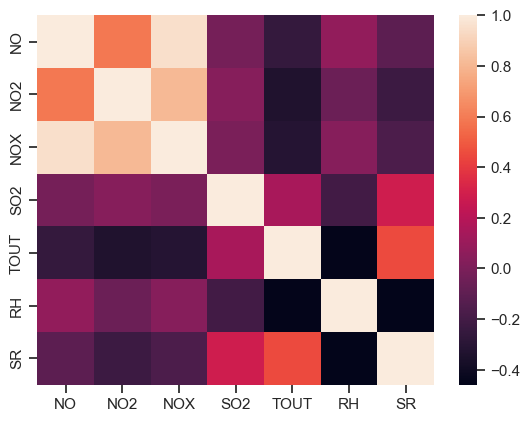

In [132]:
import seaborn as sns
sns.heatmap(limpios[["NO","NO2", "NOX", "SO2", "TOUT", "RH", "SR"]].corr());

In [179]:
from scipy.stats import shapiro, boxcox, anderson
datos = limpios[["NO","NO2", "NOX", "SO2", "TOUT", "RH", "SR"]]

In [166]:
import numpy as np

In [184]:
def normTest(values):
    p = []
    steps = 1000
    for i in range(0,len(values), steps):
       p.append(anderson(values[i:i+steps])[1])
    return p

np.mean(normTest(boxcox(datos["NO"])[0]))

0.802575

In [193]:
min(boxcox(datos["NO"])[0])

-0.9050659852258609

(array([4.0000e+00, 7.0000e+00, 7.0000e+00, 5.0000e+00, 2.2000e+01,
        1.5800e+02, 1.2770e+03, 1.5160e+04, 1.0523e+04, 4.6270e+03]),
 array([-0.90506599, -0.68083175, -0.45659752, -0.23236328, -0.00812905,
         0.21610519,  0.44033942,  0.66457366,  0.88880789,  1.11304212,
         1.33727636]),
 <BarContainer object of 10 artists>)

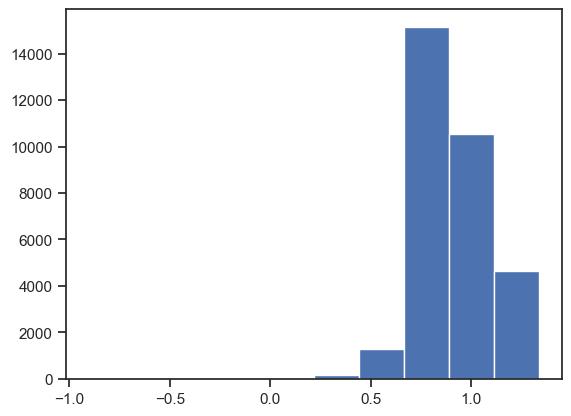

In [194]:
plt.hist(boxcox(datos["NO"])[0])

[0.02070469968020916,
 0.012240092270076275,
 0.001159267034381628,
 0.020193375647068024,
 0.002510346006602049,
 0.007673206273466349,
 2.491058467057883e-06,
 0.21175861358642578,
 0.3660862445831299,
 0.10986947268247604,
 0.00021672129514627159,
 0.3417172431945801,
 0.0003456830163486302,
 0.04276914894580841,
 0.004883409012109041,
 0.04503152146935463,
 0.00044334636186249554,
 0.08500068634748459,
 0.00024402631970588118,
 0.10386956483125687,
 0.07731656730175018,
 0.004545480478554964,
 0.00120921537745744,
 0.11264308542013168,
 0.0750189870595932,
 0.00498061440885067,
 0.122772715985775,
 0.0019703505095094442,
 0.006252489052712917,
 0.6809892654418945,
 0.39813491702079773,
 0.005735205486416817,
 0.1309506595134735,
 0.003021310782060027,
 0.008439464494585991,
 0.008389831520617008,
 0.13344499468803406,
 0.00038000717177055776,
 0.02196277491748333,
 0.4547531008720398,
 0.06042032316327095,
 0.031109537929296494,
 0.00112663593608886,
 0.7262169718742371,
 0.0013412

In [108]:
from sklearn.impute import KNNImputer as imputer
k = imputer(n_neighbors=2)
datos = k.fit_transform((datos.iloc[:, :7]).to_numpy())

ValueError: could not convert string to float: '2020-01-01'

In [ ]:
y = pd.DataFrame(datos, columns=["NO","NO2", "NOX", "SO2", "TOUT", "RH"])

y

In [21]:
df.columns[1:-1]

Index(['CO', 'NO', 'NO2', 'NOX', 'O3', 'PM10', 'PM2.5', 'PRS', 'RAINF', 'RH',
       'SO2', 'SR', 'TOUT', 'WSR', 'WDR'],
      dtype='object')

,CO,NO,NO2,NOX,O3,PM10,PM2.5,PRS,RAINF,RH,SO2,SR,TOUT,WSR,WDR
0,1.3975,4.675,4.775,8.2,28.0,37.0,18.00,734.225,0.00,66.75,20.525,0.000,8.26,5.75,185.75
1,1.8800,2.000,5.200,7.2,25.0,37.0,28.00,734.200,0.01,93.00,2.600,0.037,11.68,1.70,98.00
2,1.8600,2.600,5.000,7.6,22.0,55.0,28.00,733.800,0.02,93.00,8.050,0.037,11.68,1.60,133.00
3,1.7800,3.100,5.900,8.9,21.0,35.0,11.00,733.000,0.00,93.00,2.175,0.037,11.70,1.50,198.00
4,1.7600,2.000,4.500,6.5,22.0,27.0,3.75,732.800,0.02,93.00,4.100,0.037,11.80,0.70,240.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31785,0.7600,3.200,6.900,9.9,36.0,107.0,15.00,727.800,0.00,19.00,3.600,0.079,38.18,12.70,54.00
31786,0.7100,2.600,11.300,13.7,29.0,60.0,9.00,728.300,0.00,23.00,3.600,0.003,36.38,8.90,50.00
31787,0.7200,2.900,10.800,13.5,26.0,74.0,3.00,728.700,0.00,26.00,3.700,0.001,35.10,10.50,56.00
31788,0.6800,3.000,10.100,12.8,25.0,112.0,2.00,729.400,0.00,40.00,15.300,0.001,33.60,16.90,86.00


In [24]:
p[["NO","NO2", "NOX", "SO2", "TOUT", "RH"]]

,NO,NO2,NOX,SO2,TOUT,RH
0,4.675,4.775,8.2,20.525,8.26,66.75
1,2.000,5.200,7.2,2.600,11.68,93.00
2,2.600,5.000,7.6,8.050,11.68,93.00
3,3.100,5.900,8.9,2.175,11.70,93.00
4,2.000,4.500,6.5,4.100,11.80,93.00
...,...,...,...,...,...,...
31785,3.200,6.900,9.9,3.600,38.18,19.00
31786,2.600,11.300,13.7,3.600,36.38,23.00
31787,2.900,10.800,13.5,3.700,35.10,26.00
31788,3.000,10.100,12.8,15.300,33.60,40.00


In [123]:
limpios["fechas"] = list(df["date"])

In [124]:
limpios.head()

,date,CO,NO,NO2,NOX,O3,PM10,PM2.5,PRS,RAINF,RH,SO2,SR,TOUT,WSR,WDR,fechas
0,0.0,1.8775,4.3,6.375,10.625,19.25,37.0,18.00,733.025,0.015,92.75,0.850,0.000,12.2675,1.325,207.25,2020-01-01 00:00:00
1,1.0,1.8800,2.0,5.200,7.200,25.00,37.0,28.00,734.200,0.010,93.00,1.775,0.037,11.6800,1.700,98.00,2020-01-01 01:00:00
2,2.0,1.8600,2.6,5.000,7.600,22.00,55.0,28.00,733.800,0.020,93.00,0.750,0.037,11.6800,1.600,133.00,2020-01-01 02:00:00
3,3.0,1.7800,3.1,5.900,8.900,21.00,35.0,11.00,733.000,0.000,93.00,0.725,0.037,11.7000,1.500,198.00,2020-01-01 03:00:00
4,4.0,1.7600,2.0,4.500,6.500,22.00,27.0,10.25,732.800,0.020,93.00,0.775,0.037,11.8000,0.700,240.00,2020-01-01 04:00:00


In [126]:
limpios.to_csv("limpios.csv")

In [131]:
limpios[["NO","NO2", "NOX", "SO2", "TOUT", "RH", "SR"]].corr()

,NO,NO2,NOX,SO2,TOUT,RH,SR
NO,1.000000,0.585723,0.949473,-0.023242,-0.254402,0.074792,-0.111031
NO2,0.585723,1.000000,0.810256,0.033398,-0.337968,-0.055065,-0.229496
NOX,0.949473,0.810256,1.000000,-0.004227,-0.314058,0.033143,-0.168534
SO2,-0.023242,0.033398,-0.004227,1.000000,0.145570,-0.206477,0.282447
TOUT,-0.254402,-0.337968,-0.314058,0.145570,1.000000,-0.452812,0.451846
RH,0.074792,-0.055065,0.033143,-0.206477,-0.452812,1.000000,-0.459426
SR,-0.111031,-0.229496,-0.168534,0.282447,0.451846,-0.459426,1.000000


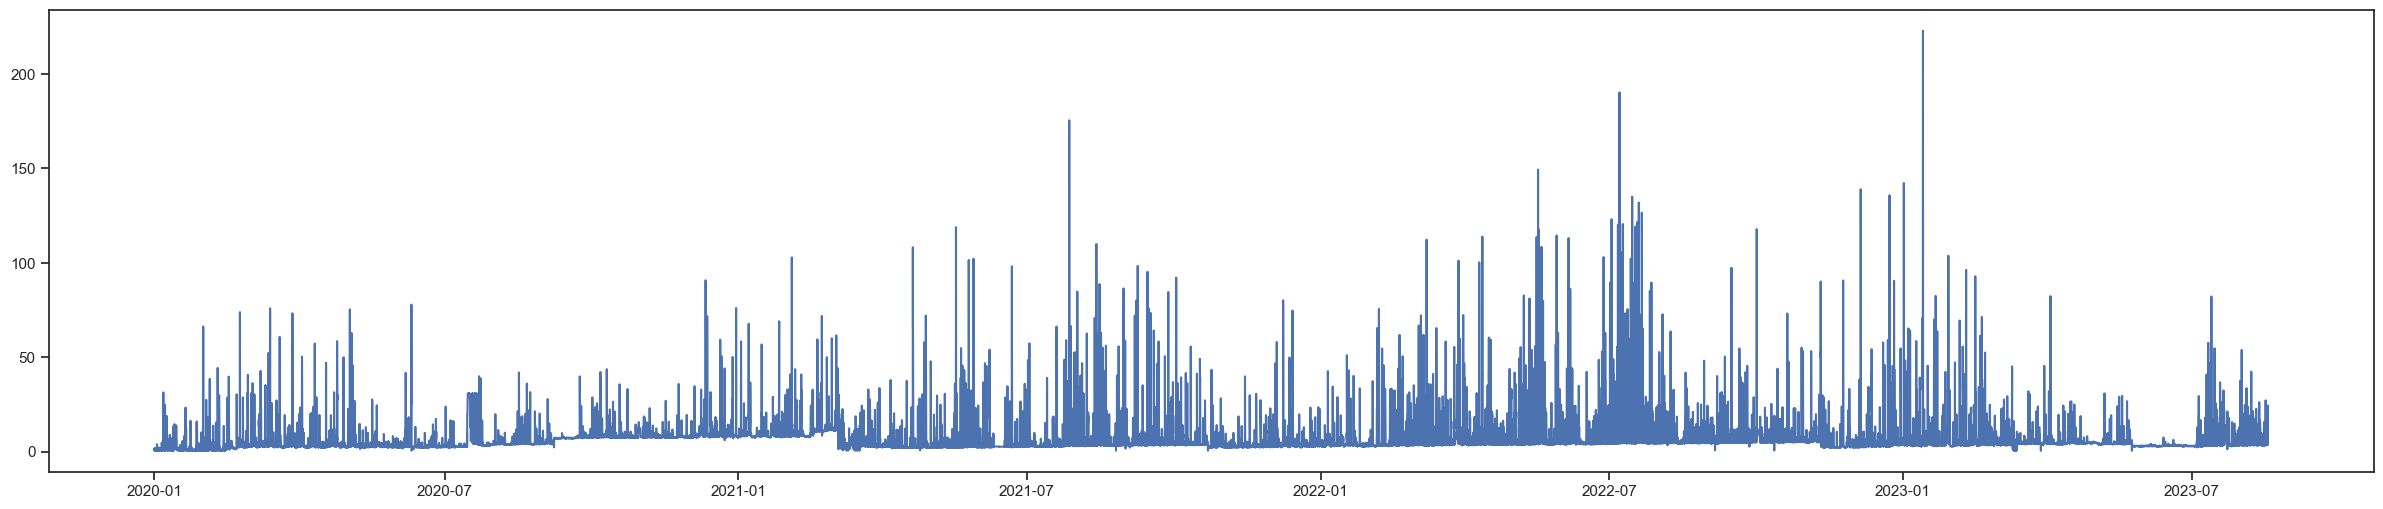

In [125]:
plt.figure(figsize=(30,6))
plt.plot(limpios["fechas"],limpios["SO2"])

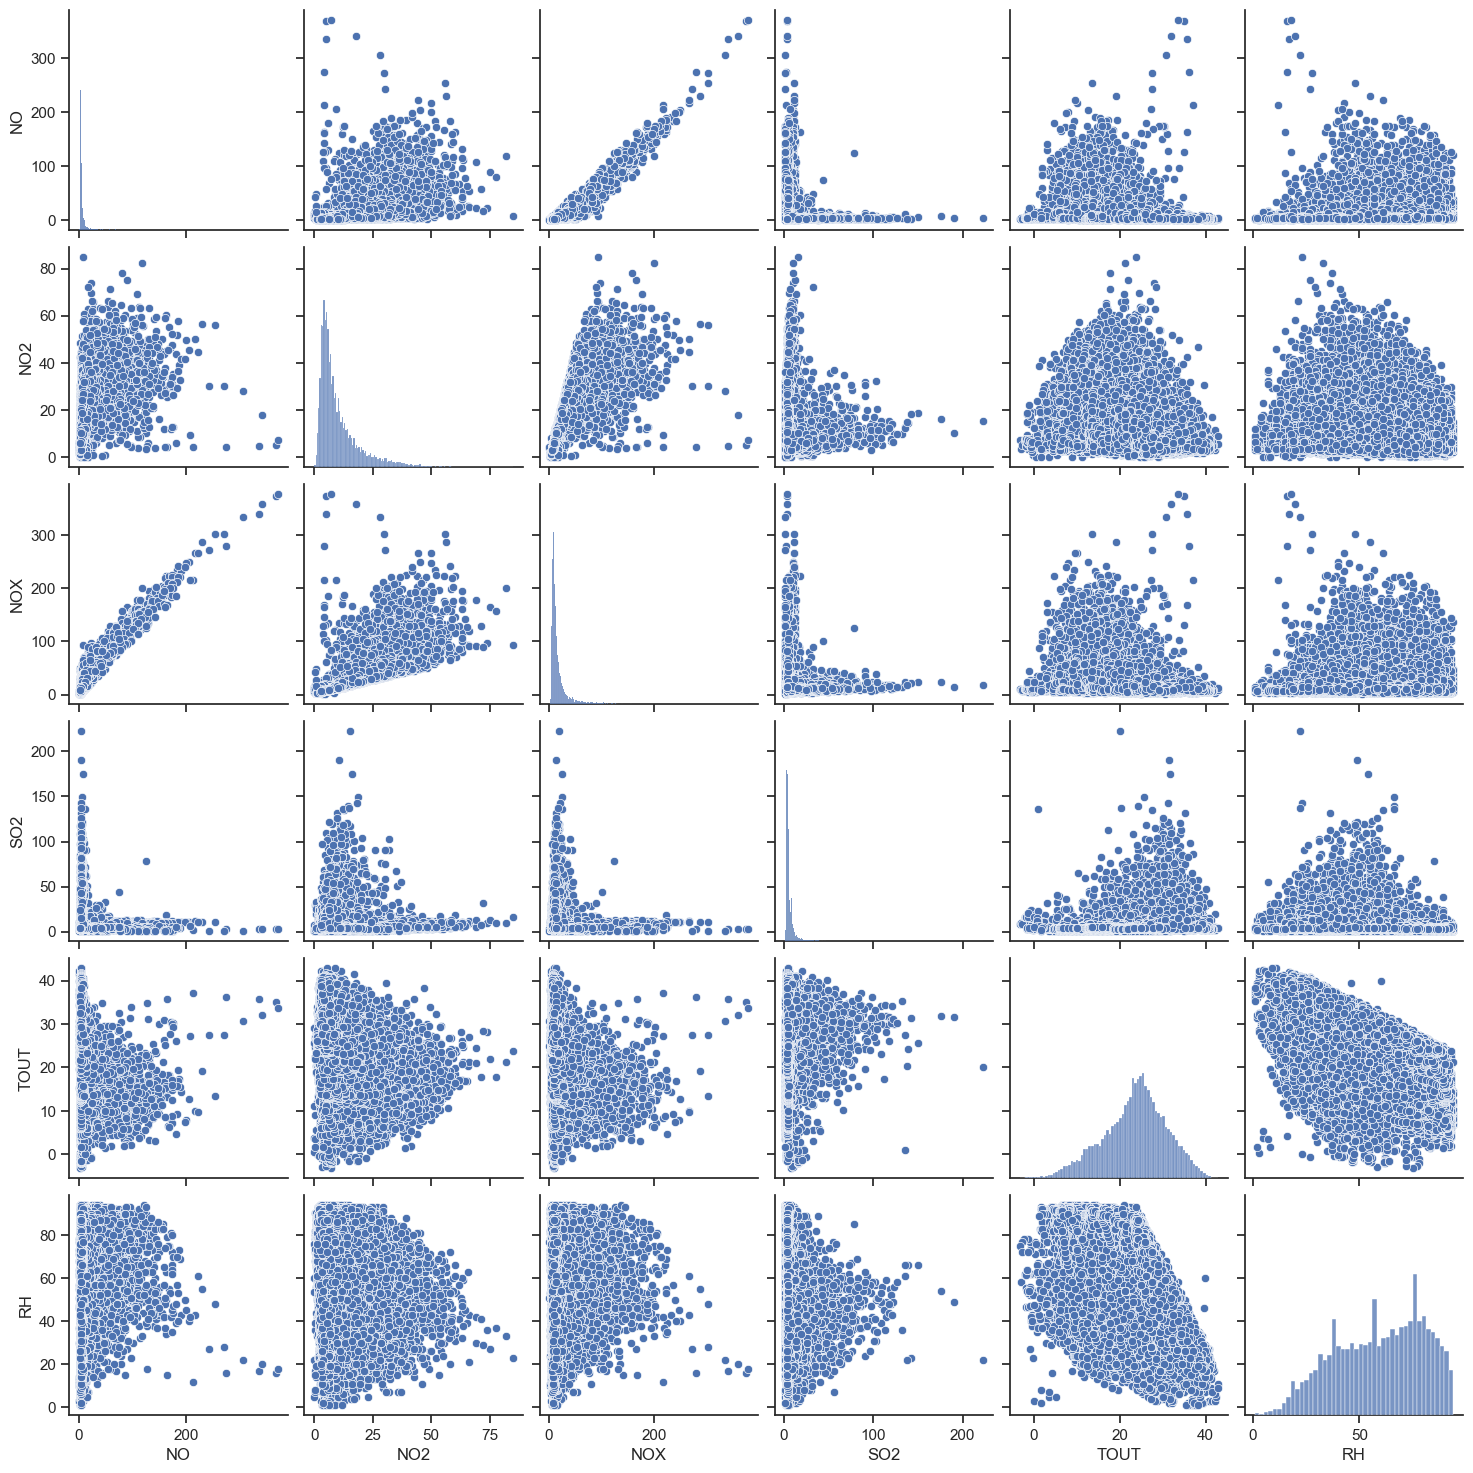

In [128]:

import  matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks")
sns.pairplot(limpios[["NO","NO2", "NOX", "SO2", "TOUT", "RH"]], height=2.5)
plt.show()

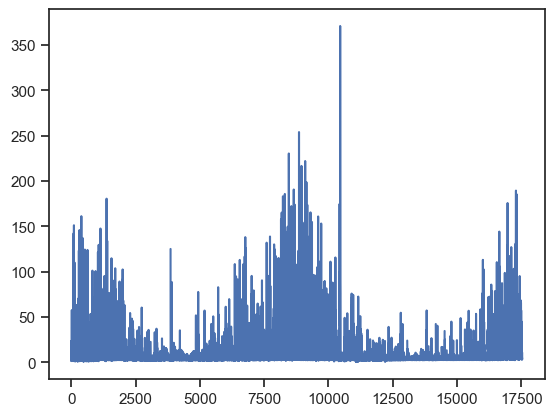

In [111]:
plt.plot(datos["NO"])

,CO,NO,NO2,NOX,O3,PM10,PM2.5,PRS,RAINF,RH,SO2,SR,TOUT,WSR,WDR
0,1.3975,4.675,4.775,8.2,28.0,37.0,18.00,734.225,0.00,66.75,20.525,0.000,8.26,5.75,185.75
1,1.8800,2.000,5.200,7.2,25.0,37.0,28.00,734.200,0.01,93.00,2.600,0.037,11.68,1.70,98.00
2,1.8600,2.600,5.000,7.6,22.0,55.0,28.00,733.800,0.02,93.00,8.050,0.037,11.68,1.60,133.00
3,1.7800,3.100,5.900,8.9,21.0,35.0,11.00,733.000,0.00,93.00,2.175,0.037,11.70,1.50,198.00
4,1.7600,2.000,4.500,6.5,22.0,27.0,3.75,732.800,0.02,93.00,4.100,0.037,11.80,0.70,240.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31785,0.7600,3.200,6.900,9.9,36.0,107.0,15.00,727.800,0.00,19.00,3.600,0.079,38.18,12.70,54.00
31786,0.7100,2.600,11.300,13.7,29.0,60.0,9.00,728.300,0.00,23.00,3.600,0.003,36.38,8.90,50.00
31787,0.7200,2.900,10.800,13.5,26.0,74.0,3.00,728.700,0.00,26.00,3.700,0.001,35.10,10.50,56.00
31788,0.6800,3.000,10.100,12.8,25.0,112.0,2.00,729.400,0.00,40.00,15.300,0.001,33.60,16.90,86.00
